In [1]:
import findspark
findspark.init()

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [3]:
from pyspark.sql.session import SparkSession

spark = (SparkSession.builder
    .appName("Spotify_Twitter")
    .getOrCreate())

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/03 18:20:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Load Spotify 5 Main Artists

In [4]:
main_artist_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("Main_Artist_DF.csv")            
            .distinct())

In [5]:
main_artist_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+
|              images|followers|popularity|        name|               genre|           artist_id|
+--------------------+---------+----------+------------+--------------------+--------------------+
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|
+--------------------+---------+----------+------------+--------------------+--------------------+



In [6]:
# Create a Main Artist Dict
main_artist_dict = {"OneRepublic":"5Pwc4xIPtQLFEnJriah9YJ", "Harry Styles":"6KImCVD70vtIoJWnq6nGn3", "The Weeknd":"1Xyo4u8uXC1ZmMpatF05PJ", "John Legend":"5y2Xq6xcjJb2jVM54GHK3t" ,"Bad Bunny":"4q3ewBCX7sLwd24euuV69X"}

# Load Spotify Top 10 Tracks  for 5 Main Artists Data

In [7]:
top_tracks_main_artist = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/artist_top_tracks")            
            .distinct())

In [8]:
top_tracks_main_artist.show()

+-----------+-------------------+--------------------+--------------------+---------------+--------------------+--------------------+
|duration_ms|       release_date|          artists_id|                name|   artists_name|                  id|           artist_id|
+-----------+-------------------+--------------------+--------------------+---------------+--------------------+--------------------+
|     281466|2005-12-06 00:00:00|5y2Xq6xcjJb2jVM54...|     Ordinary People|    John Legend|2ZA4uMlSZjaoWGFqP...|5y2Xq6xcjJb2jVM54...|
|     269560|2013-08-30 00:00:00|5y2Xq6xcjJb2jVM54...|           All of Me|    John Legend|3U4isOIWM3VvDubwS...|5y2Xq6xcjJb2jVM54...|
|     190605|2022-05-19 00:00:00|5NhgsV7qPWHZqYEMK...|          Minefields|        Faouzia|0vH52Icuf6LzOFrkH...|5y2Xq6xcjJb2jVM54...|
|     188046|2022-09-09 00:00:00|5y2Xq6xcjJb2jVM54...|             Nervous|    John Legend|1XNAH3h63O1hWFcgy...|5y2Xq6xcjJb2jVM54...|
|     168562|2022-09-09 00:00:00|5y2Xq6xcjJb2jVM54...|        

# Load Spotify Top Charts Songs - 2022 

In [9]:
spotify_top_charts_22 = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/spotify_top_charts_22.csv")            
            .distinct())

In [10]:
spotify_top_charts_22.show()
spotify_top_charts_22.printSchema()

+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+
|                 uri|        artist_names|          track_name|peak_rank|weeks_on_chart|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|  tempo|time_signature|duration_ms|
+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+
|spotify:track:4zN...|James Hype, Miggy...|             Ferrari|       36|            10|       0.847|  0.69|  1|  -7.877|   0|     0.0493|      0.0127|          6.0E-5|  0.0526|125.004|             4|     186662|
|spotify:track:1E5...|          The Weeknd|        Best Friends|       26|             2|       0.737| 0.564|  4|  -7.045|   0|      0.105|     

# Load Spotify Related Artist Data for 5 Main Artist

In [11]:
related_artist_main_artist = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/related_artist")            
            .distinct())

In [12]:
related_artist_main_artist.show()

+--------------------+---------+----------+-----------------+----------------+--------------------+--------------------+
|              images|followers|popularity|             name|           genre|                  id|           artist_id|
+--------------------+---------+----------+-----------------+----------------+--------------------+--------------------+
|https://i.scdn.co...|  2159260|        56|           Tyrese|contemporary r&b|08p7B5OtcUuVblvkQ...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|   603702|        49|       Eric Benét|contemporary r&b|1kjO72M26jZkv0aaG...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|  1264802|        54|           Jaheim|contemporary r&b|4sbB4Yy6Qig51pKCI...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|  1411870|        59| Anthony Hamilton|contemporary r&b|2DzRMyWgjuMbYvt5B...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|  1600813|        57|       Jill Scott|            funk|6AVLthptCPhfrxlHa...|5y2Xq6xcjJb2jVM54...|
|https://i.scdn.co...|  1590664|

# Load Twitter Data for 5 Main Artist

In [13]:
one_republic_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/one_republic.json")            
            .distinct())

In [14]:
harry_styles_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/harry_styles.json")            
            .distinct())

In [15]:
john_legend_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/john_legend.json")            
            .distinct())

In [16]:
bad_bunny_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/bad_bunny.json")            
            .distinct())

In [17]:
the_weekend_tweet_df  = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .json("twitter/the_weekend.json")            
            .distinct())

# Load All Artist Consolidate Tweet for Month per Day

In [18]:
consolidated_tweet_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("twitter/consolidated_artists_tweets_count.csv")            
            .distinct())

# Load Main Artist Consolidate Tweet for Month per Day

In [19]:
from pyspark.sql.functions import *
consolidated_tweet_df.show()

+-------------------+-------------------+-----------+------------+--------------------+
|                end|              start|tweet_count|        name|           artist_id|
+-------------------+-------------------+-----------+------------+--------------------+
|2022-09-07 05:30:00|2022-09-06 05:30:00|       5056|      J.Cole|6l3HvQ5sa6mXTsMTB...|
|2022-09-02 05:30:00|2022-09-01 05:30:00|      24428|      J.Cole|6l3HvQ5sa6mXTsMTB...|
|2022-09-29 05:30:00|2022-09-28 05:30:00|       3226|Harry Styles|6KImCVD70vtIoJWnq...|
|2022-09-06 05:30:00|2022-09-05 05:30:00|        751|One Republic|10Pwc4xIPtQLFEnJr...|
|2022-09-14 05:30:00|2022-09-13 05:30:00|        921|One Republic|18Pwc4xIPtQLFEnJr...|
|2022-09-28 05:30:00|2022-09-27 05:30:00|        404|       6LACK|4IVAbR2w4JJNJDDRF...|
|2022-09-07 05:30:00|2022-09-06 05:30:00|       2266|   Bad Bunny|10q3ewBCX7sLwd24e...|
|2022-09-24 05:30:00|2022-09-23 05:30:00|         11|Majid Jordan|27HzKw8XcD0piJmDr...|
|2022-09-13 05:30:00|2022-09-12 

# 5 Main Artist Tweet Count for Month

In [20]:
from pyspark.sql.functions import when, lit, col, create_map

main_artist_tweet_count_df = main_artist_df.withColumn("tweets_last_month",
              when((main_artist_df.name  == "OneRepublic"), one_republic_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "Harry Styles"), harry_styles_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "John Legend"), john_legend_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "Bad Bunny"), bad_bunny_tweet_df.select(sum("tweet_count")).first()[0]).
              when((main_artist_df.name  == "The Weeknd"), the_weekend_tweet_df.select(sum("tweet_count")).first()[0]))

main_artist_tweet_count_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|              images|followers|popularity|        name|               genre|           artist_id|tweets_last_month|
+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|            48225|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|           169904|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|            20792|
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|           195074|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|            57322|
+--------------------+---------+----------+------------+--------

# Business Questions - I

### A. What ranking these 5 Featured artists are based on number of songs on top charts, and how many songs our feature artist has had in the top charts in 2022?

### B. On average, for how many weeks each featured artist has been on the top charts?

In [21]:
top_5_artist_list = ["OneRepublic", "Harry Styles", "The Weeknd", "John Legend", "Bad Bunny"]

# save top chart songs for 5 main artist including song with featured artist
spotify_top_charts_22_main_artist = spotify_top_charts_22.filter(col("artist_names").contains("OneRepublic") |
                                                       col("artist_names").contains("Harry Styles") |
                                                       col("artist_names").contains("The Weeknd") |
                                                       col("artist_names").contains("John Legend") |
                                                       col("artist_names").contains("Bad Bunny")
                                                      ) 

spotify_top_charts_22_main_artist_ = spotify_top_charts_22_main_artist.withColumn("main_artist",
              when((spotify_top_charts_22_main_artist.artist_names.contains("OneRepublic")), lit("OneRepublic")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("Harry Styles")), lit("Harry Styles")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("The Weeknd")), lit("The Weeknd")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("John Legend")), lit("John Legend")).
              when((spotify_top_charts_22_main_artist.artist_names.contains("Bad Bunny")), lit("Bad Bunny"))
             )

# A. Total Song in Top Charts for 5 Main Artist
# B. On average, for how many weeks each featured artist has been on the top charts?

spotify_top_charts_22_main_artist_.groupBy("main_artist")\
    .agg(count("*").alias("Total Song on Top Chart"), avg("weeks_on_chart").alias("Average Week on Top Charts"))\
.withColumnRenamed("main_artist","Artist").show(truncate=False)

+------------+-----------------------+--------------------------+
|Artist      |Total Song on Top Chart|Average Week on Top Charts|
+------------+-----------------------+--------------------------+
|Bad Bunny   |35                     |20.285714285714285        |
|OneRepublic |2                      |32.0                      |
|Harry Styles|18                     |25.22222222222222         |
|John Legend |1                      |145.0                     |
|The Weeknd  |32                     |21.15625                  |
+------------+-----------------------+--------------------------+



### C. Do they appear on the top charts as single artist or in collaborations (together with another artists)

In [22]:
# Populate if the artist has collaborated with another artist in the chart
spotify_top_charts_22_main_artist_collaboration = spotify_top_charts_22_main_artist_.withColumn("collaboration",
              when((spotify_top_charts_22_main_artist.artist_names.startswith("OneRepublic") & spotify_top_charts_22_main_artist.artist_names.endswith("OneRepublic")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("Harry Styles") & spotify_top_charts_22_main_artist.artist_names.endswith("Harry Styles")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("The Weeknd") & spotify_top_charts_22_main_artist.artist_names.endswith("The Weeknd")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("John Legend") & spotify_top_charts_22_main_artist.artist_names.endswith("John Legend")), False)
              .when((spotify_top_charts_22_main_artist.artist_names.startswith("Bad Bunny") & spotify_top_charts_22_main_artist.artist_names.endswith("Bad Bunny")), False)
              .otherwise(True)) 

spotify_top_charts_22_main_artist_collaboration.show()
# Group Solo Artist song and their collaboration song and find sum of the week on charts

collboration_grouped_df = spotify_top_charts_22_main_artist_collaboration.groupBy(["main_artist","collaboration"])\
    .agg(count("*").alias("total_song"), sum("weeks_on_chart").alias("sum_week_on_charts"))

collboration_grouped_df.show()

+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+------------+-------------+
|                 uri|        artist_names|          track_name|peak_rank|weeks_on_chart|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|  tempo|time_signature|duration_ms| main_artist|collaboration|
+--------------------+--------------------+--------------------+---------+--------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+--------------+-----------+------------+-------------+
|spotify:track:1E5...|          The Weeknd|        Best Friends|       26|             2|       0.737| 0.564|  4|  -7.045|   0|      0.105|       0.436|             0.0|   0.351|   90.0|             4|     163504|  The Weeknd|        false|
|spotify:track:759...|          The 

### Analytical - Window Function to return the if the maximum of sum of week on charts as by single or in collaboration with featuring artist

In [23]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number

windowDept = Window.partitionBy("main_artist").orderBy(col("sum_week_on_charts").desc())
collboration_grouped_df.withColumn("row",row_number().over(windowDept)) \
  .filter(col("row") == 1).drop("row").show()

+------------+-------------+----------+------------------+
| main_artist|collaboration|total_song|sum_week_on_charts|
+------------+-------------+----------+------------------+
|   Bad Bunny|         true|        16|               471|
|Harry Styles|        false|        18|               454|
| John Legend|        false|         1|               145|
| OneRepublic|        false|         2|                64|
|  The Weeknd|        false|        20|               359|
+------------+-------------+----------+------------------+



# Business Questions - II

### A. Is popularity rank in Spotify aligned to the total amount of tweets we have observed during the last month?

In [24]:
# Sort the popularity of tweets for the artist
main_artist_tweet_count_df = main_artist_tweet_count_df.sort("popularity")
main_artist_tweet_count_df.show()

+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|              images|followers|popularity|        name|               genre|           artist_id|tweets_last_month|
+--------------------+---------+----------+------------+--------------------+--------------------+-----------------+
|https://i.scdn.co...|  6291069|        77| John Legend|          neo mellow|5y2Xq6xcjJb2jVM54...|           195074|
|https://i.scdn.co...| 14400245|        85| OneRepublic|          piano rock|5Pwc4xIPtQLFEnJri...|            48225|
|https://i.scdn.co...| 23987672|        90|Harry Styles|                 pop|6KImCVD70vtIoJWnq...|           169904|
|https://i.scdn.co...| 51405766|        94|  The Weeknd|canadian contempo...|1Xyo4u8uXC1ZmMpat...|            20792|
|https://i.scdn.co...| 57945768|        99|   Bad Bunny|           reggaeton|4q3ewBCX7sLwd24eu...|            57322|
+--------------------+---------+----------+------------+--------

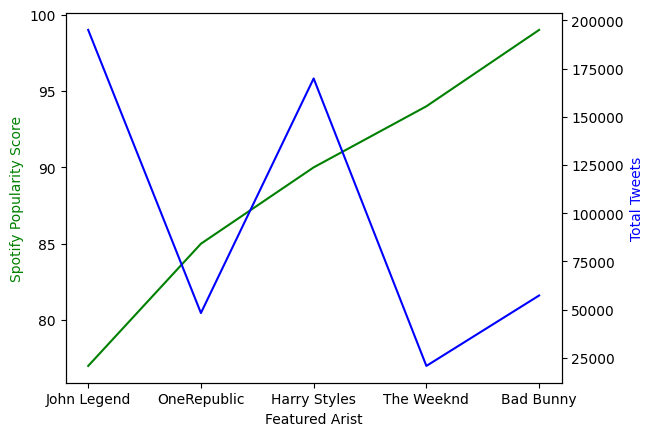

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark Dataframe to Pandas() dataframe
main_artist_tweet_count_df = main_artist_tweet_count_df.toPandas()

x = main_artist_tweet_count_df['name']
y1 = main_artist_tweet_count_df['popularity']
y2 = main_artist_tweet_count_df['tweets_last_month']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Spotify Popularity Score', color = 'g')
ax2.set_ylabel('Total Tweets', color = 'b')

plt.show()

### B. Has any of the features artist increase/decreased popularity in the last month?

In [26]:
import numpy as np
def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    if float(slope) == 0:
        return "Neutral"
    return "Increasing" if float(slope) > 0 else "Decreasing"

total_tweet = one_republic_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = one_republic_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for OneRepublic is : {trendline(index,sequence)}") 

total_tweet = harry_styles_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = harry_styles_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for Harry Styles is : {trendline(index,sequence)}") 

total_tweet = john_legend_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = john_legend_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for John Legend is : {trendline(index,sequence)}") 

total_tweet = bad_bunny_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = bad_bunny_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for Bad Bunny is : {trendline(index,sequence)}") 

total_tweet = the_weekend_tweet_df.count()
index = list(range(1, total_tweet+1))
sequence = the_weekend_tweet_df.select("tweet_count").toPandas().values.reshape(-1)
print(f"Twitter Trend for The Weeknd is : {trendline(index,sequence)}") 

Twitter Trend for OneRepublic is : Increasing
Twitter Trend for Harry Styles is : Increasing
Twitter Trend for John Legend is : Increasing
Twitter Trend for Bad Bunny is : Decreasing
Twitter Trend for The Weeknd is : Decreasing


#### Reference : https://stackoverflow.com/questions/55649356/how-can-i-detect-if-trend-is-increasing-or-decreasing-in-time-series

# Business Questions - III

### A. What is the popularity of the related artists according to the degree of popularity and number of followers? 

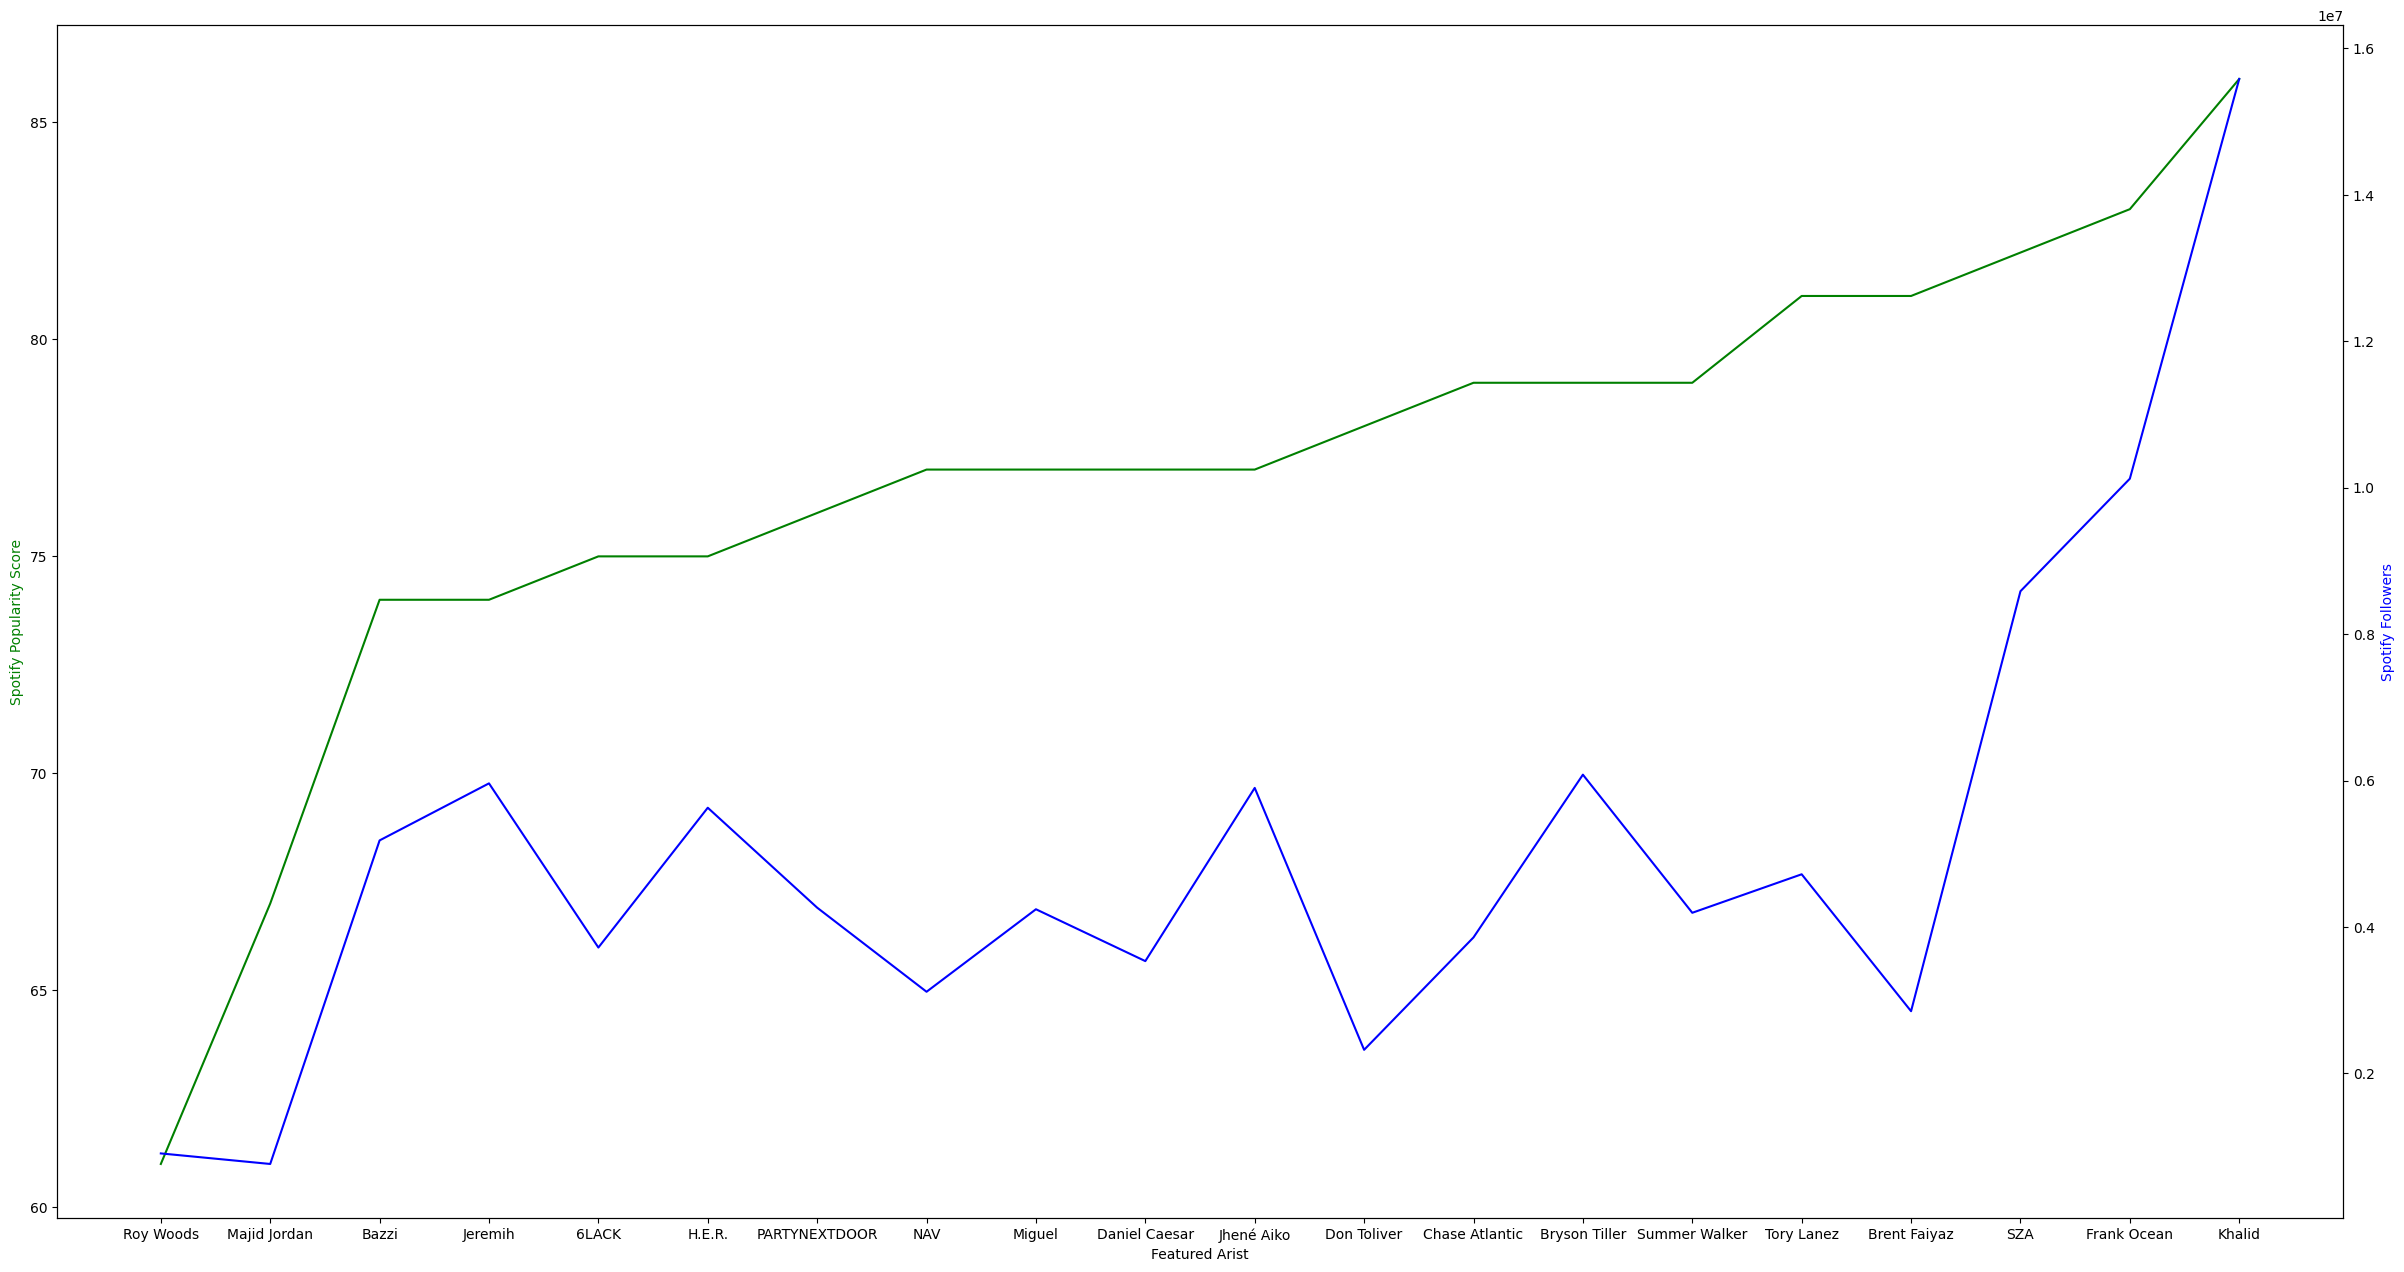

In [27]:
the_weekend_related_artist = related_artist_main_artist.filter(related_artist_main_artist["artist_id"] == '1Xyo4u8uXC1ZmMpatF05PJ')
popularity_meter = the_weekend_related_artist.sort("popularity")
popularity_meter = popularity_meter.toPandas()


x = popularity_meter['name']
y1 = popularity_meter['popularity']
y2 = popularity_meter['followers']

fig, ax1 = plt.subplots()
fig.set_size_inches(29.5, 15.5)


ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Spotify Popularity Score', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()


### B. What is the popularity of the related artists according to the count of tweets of the last month?
Considering only 'The Weeknd' | Artist Id - 1Xyo4u8uXC1ZmMpatF05PJ

In [28]:
list_of_related_artist = list(the_weekend_related_artist.select("name").toPandas().values.reshape(-1))
print(list_of_related_artist)

['6LACK', 'Khalid', 'Chase Atlantic', 'NAV', 'Don Toliver', 'Majid Jordan', 'Bryson Tiller', 'Bazzi', 'Tory Lanez', 'H.E.R.', 'Summer Walker', 'Brent Faiyaz', 'SZA', 'Miguel', 'Daniel Caesar', 'Jhené Aiko', 'PARTYNEXTDOOR', 'Roy Woods', 'Frank Ocean', 'Jeremih']


### Find Twitter Trend for Related Artist for 'The Weeknd'

In [29]:
related_consolidated_tweet_df = consolidated_tweet_df.filter(consolidated_tweet_df.name.isin(list_of_related_artist))
related_artist_sum_tweets_df = related_consolidated_tweet_df.groupBy("name")\
    .agg(sum("tweet_count").alias("total_tweet"))
related_artist_sum_tweets_df.show()

+-------------+-----------+
|         name|total_tweet|
+-------------+-----------+
|Bryson Tiller|       8696|
|PARTYNEXTDOOR|      31552|
|        6LACK|      22678|
| Majid Jordan|        384|
| Brent Faiyaz|      79037|
+-------------+-----------+



In [30]:
matched_list_of_related_artist = list(related_consolidated_tweet_df.dropDuplicates(["name"]).select("name").toPandas().values.reshape(-1))
print(matched_list_of_related_artist)

['Bryson Tiller', 'PARTYNEXTDOOR', '6LACK', 'Majid Jordan', 'Brent Faiyaz']


In [31]:
from collections import defaultdict
related_artist_twitter_trend = defaultdict(int)

for artist in matched_list_of_related_artist:
    df = related_consolidated_tweet_df.filter(related_consolidated_tweet_df.name == artist).sort("start")
    total_tweet = df.count()
    index = list(range(1, total_tweet+1))
    sequence = df.select("tweet_count").toPandas().values.reshape(-1)
    result = trendline(index,sequence)
    print(f"Twitter Trend for {artist} is : {result}")
    result_value = None
    if result == "Increasing":
        result_value = 1
    if result == "Neutral":
        result_value = 0
    if result == "Decreasing":
        result_value = -1
    related_artist_twitter_trend[artist] = result_value

Twitter Trend for Bryson Tiller is : Increasing
Twitter Trend for PARTYNEXTDOOR is : Increasing
Twitter Trend for 6LACK is : Increasing
Twitter Trend for Majid Jordan is : Decreasing
Twitter Trend for Brent Faiyaz is : Increasing


In [32]:
# Find the twiter trends of related artist
map_col = create_map([lit(x) for i in related_artist_twitter_trend.items() for x in i])
related_artist_sum_tweets_df = related_artist_sum_tweets_df.withColumn('trend', map_col[col('name')])
related_artist_sum_tweets_df.show()

# Find the followers for the related artist
popular_score_related_artist = related_artist_sum_tweets_df.join(the_weekend_related_artist,related_artist_sum_tweets_df.name ==  the_weekend_related_artist.name,"left") \
   .select(related_artist_sum_tweets_df["*"], the_weekend_related_artist["followers"])

popular_score_related_artist.show()

+-------------+-----------+-----+
|         name|total_tweet|trend|
+-------------+-----------+-----+
|Bryson Tiller|       8696|    1|
|PARTYNEXTDOOR|      31552|    1|
|        6LACK|      22678|    1|
| Majid Jordan|        384|   -1|
| Brent Faiyaz|      79037|    1|
+-------------+-----------+-----+

+-------------+-----------+-----+---------+
|         name|total_tweet|trend|followers|
+-------------+-----------+-----+---------+
|Bryson Tiller|       8696|    1|  6079846|
|PARTYNEXTDOOR|      31552|    1|  4264095|
|        6LACK|      22678|    1|  3719712|
| Majid Jordan|        384|   -1|   764767|
| Brent Faiyaz|      79037|    1|  2850516|
+-------------+-----------+-----+---------+



### Graph : Total Tweet Vs Spotify Followers

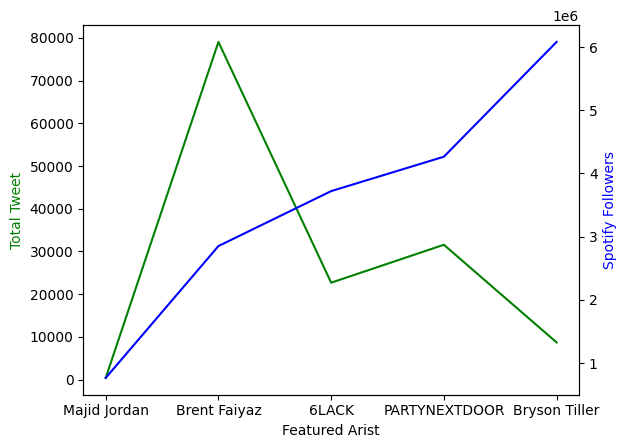

In [33]:
popular_score_related_artist = popular_score_related_artist.sort("followers")
popular_score_related_artist = popular_score_related_artist.toPandas()


x = popular_score_related_artist['name']
y1 = popular_score_related_artist['total_tweet']
y2 = popular_score_related_artist['followers']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Total Tweet', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()

### Graph : Tweet Trend Vs Spotify Followers

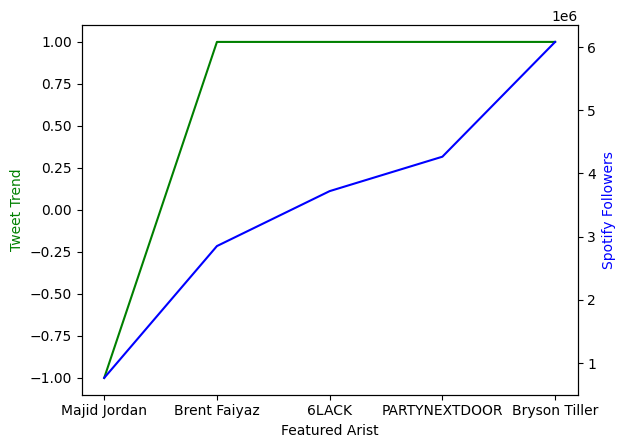

In [34]:
x = popular_score_related_artist['name']
y1 = popular_score_related_artist['trend']
y2 = popular_score_related_artist['followers']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Featured Arist', color = 'black')
ax1.set_ylabel('Tweet Trend', color = 'g')
ax2.set_ylabel('Spotify Followers', color = 'b')

plt.show()

# Business Questions - IV

### A. What are the top 5 songs per featured artists?
### B. Has any of those top songs been in the top charts for 2022? For how many weeks?
### C. From the charts find the song name which has been in the maximum in the top charts!

Showing Any Top 5 Song for Artist : OneRepublic
+---------------+
|name           |
+---------------+
|Sunshine       |
|I Ain't Worried|
|Secrets        |
|West Coast     |
|Good Life      |
+---------------+
only showing top 5 rows

Showing Song for Artist : OneRepublic on the Charts Week sorted by Week on Chart
+---------------+------+--------------------+------------+--------------+
|     track_name|energy|           artist_id|artist_names|weeks_on_chart|
+---------------+------+--------------------+------------+--------------+
|I Ain't Worried| 0.797|5Pwc4xIPtQLFEnJri...| OneRepublic|            10|
+---------------+------+--------------------+------------+--------------+

Song which has been in the maximum in the top charts is : I Ain't Worried with 10 week(s) on Charts 


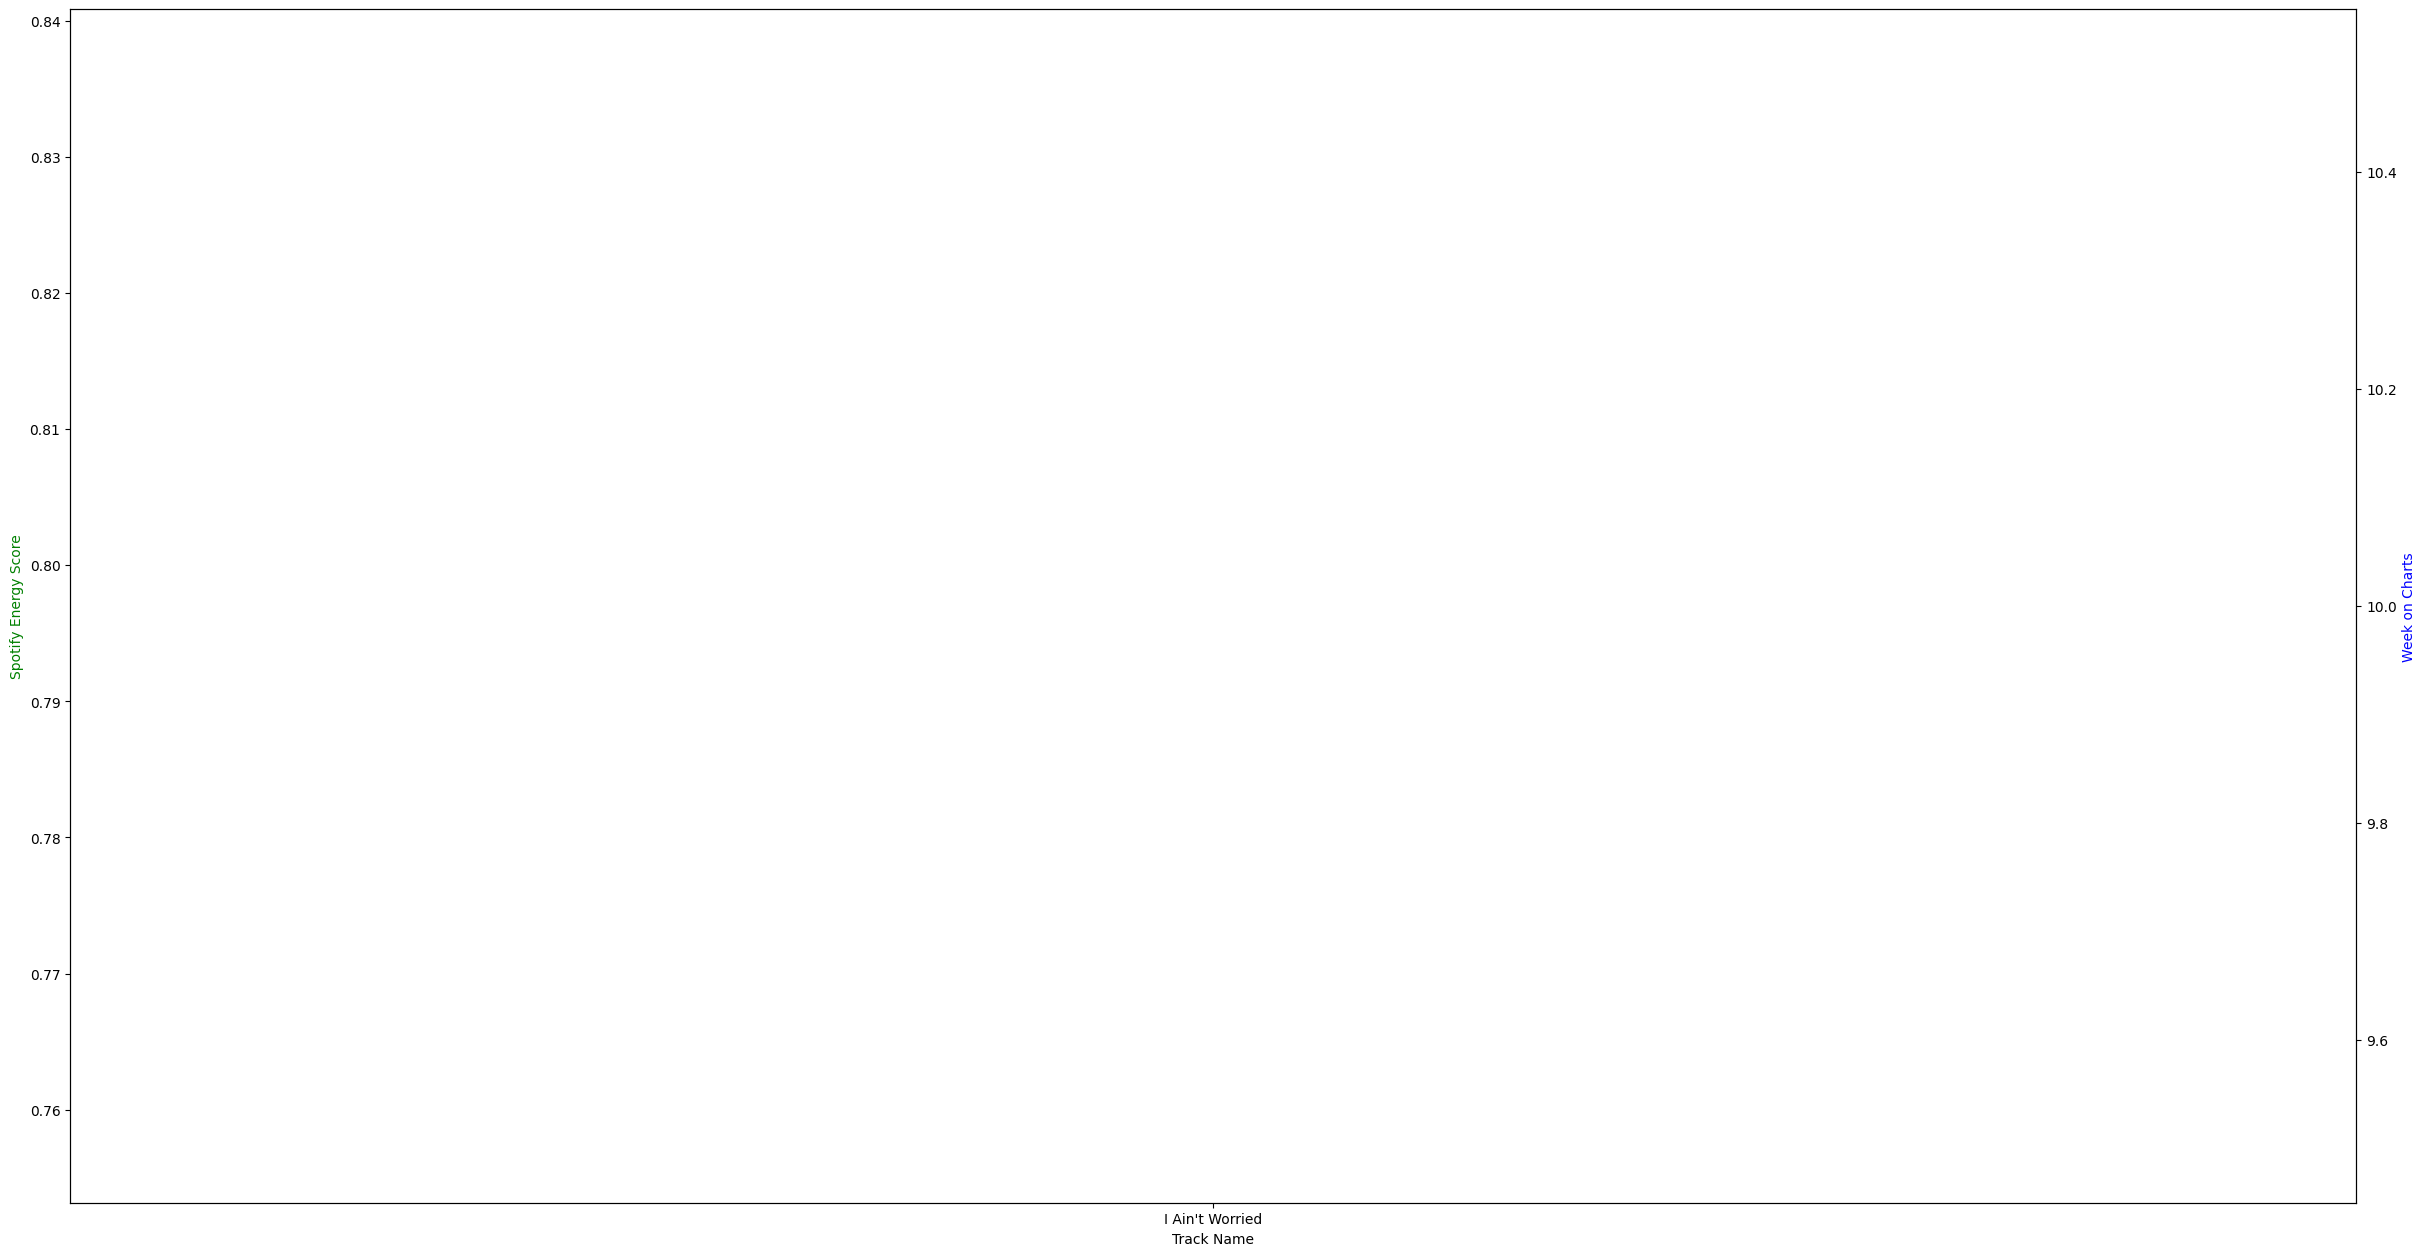

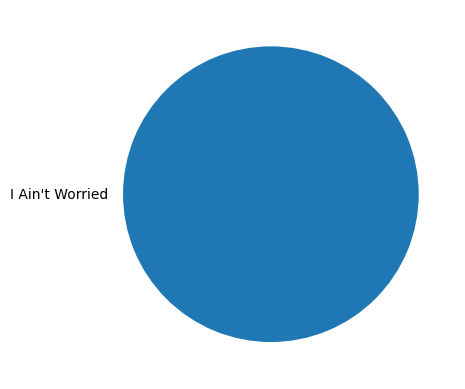

Showing Any Top 5 Song for Artist : Harry Styles
+------------------+
|name              |
+------------------+
|Watermelon Sugar  |
|Matilda           |
|Adore You         |
|Little Freak      |
|Late Night Talking|
+------------------+
only showing top 5 rows

Showing Song for Artist : Harry Styles on the Charts Week sorted by Week on Chart
+--------------------+------+--------------------+------------+--------------+
|          track_name|energy|           artist_id|artist_names|weeks_on_chart|
+--------------------+------+--------------------+------------+--------------+
|        Little Freak| 0.535|6KImCVD70vtIoJWnq...|Harry Styles|             2|
|            Daylight| 0.445|6KImCVD70vtIoJWnq...|Harry Styles|             2|
|Music For a Sushi...| 0.715|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|             Matilda| 0.294|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|  Late Night Talking| 0.728|6KImCVD70vtIoJWnq...|Harry Styles|            12|
|           As It Was| 

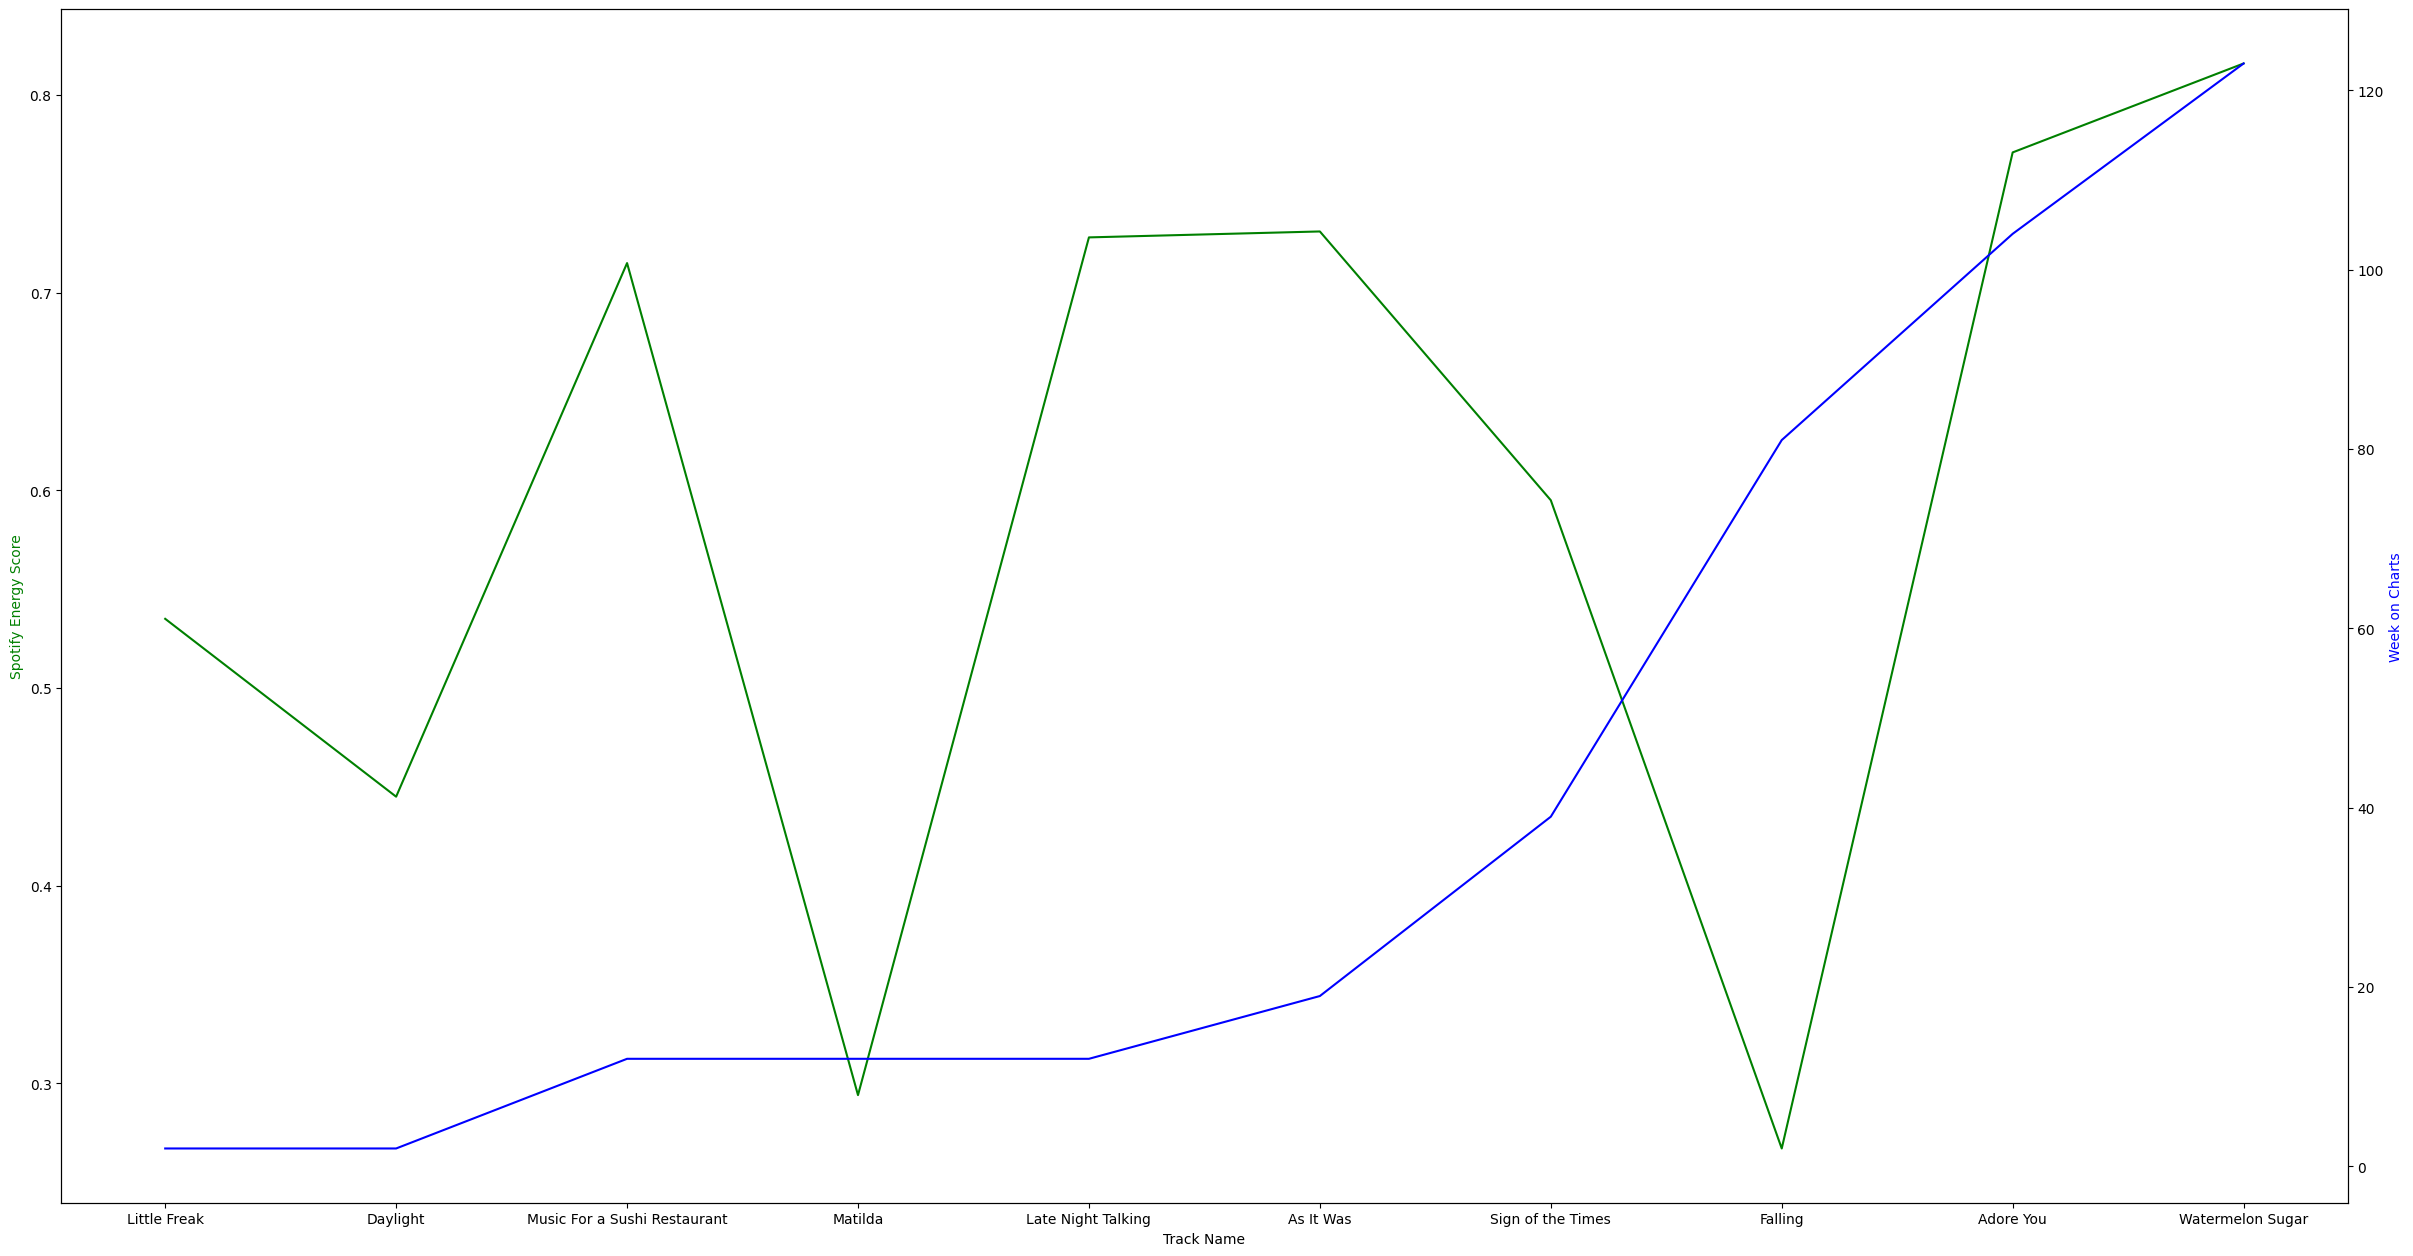

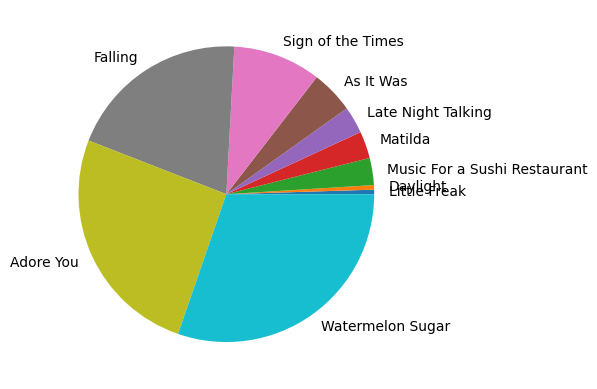

Showing Any Top 5 Song for Artist : The Weeknd
+----------------------------------------------------------+
|name                                                      |
+----------------------------------------------------------+
|Save Your Tears (Remix) (with Ariana Grande) - Bonus Track|
|Lost in the Fire (feat. The Weeknd)                       |
|I Was Never There                                         |
|Blinding Lights                                           |
|The Hills                                                 |
+----------------------------------------------------------+
only showing top 5 rows

Showing Song for Artist : The Weeknd on the Charts Week sorted by Week on Chart
+--------------------+------+--------------------+--------------------+--------------+
|          track_name|energy|           artist_id|        artist_names|weeks_on_chart|
+--------------------+------+--------------------+--------------------+--------------+
|   I Was Never There| 0.737|1Xyo4u8uX

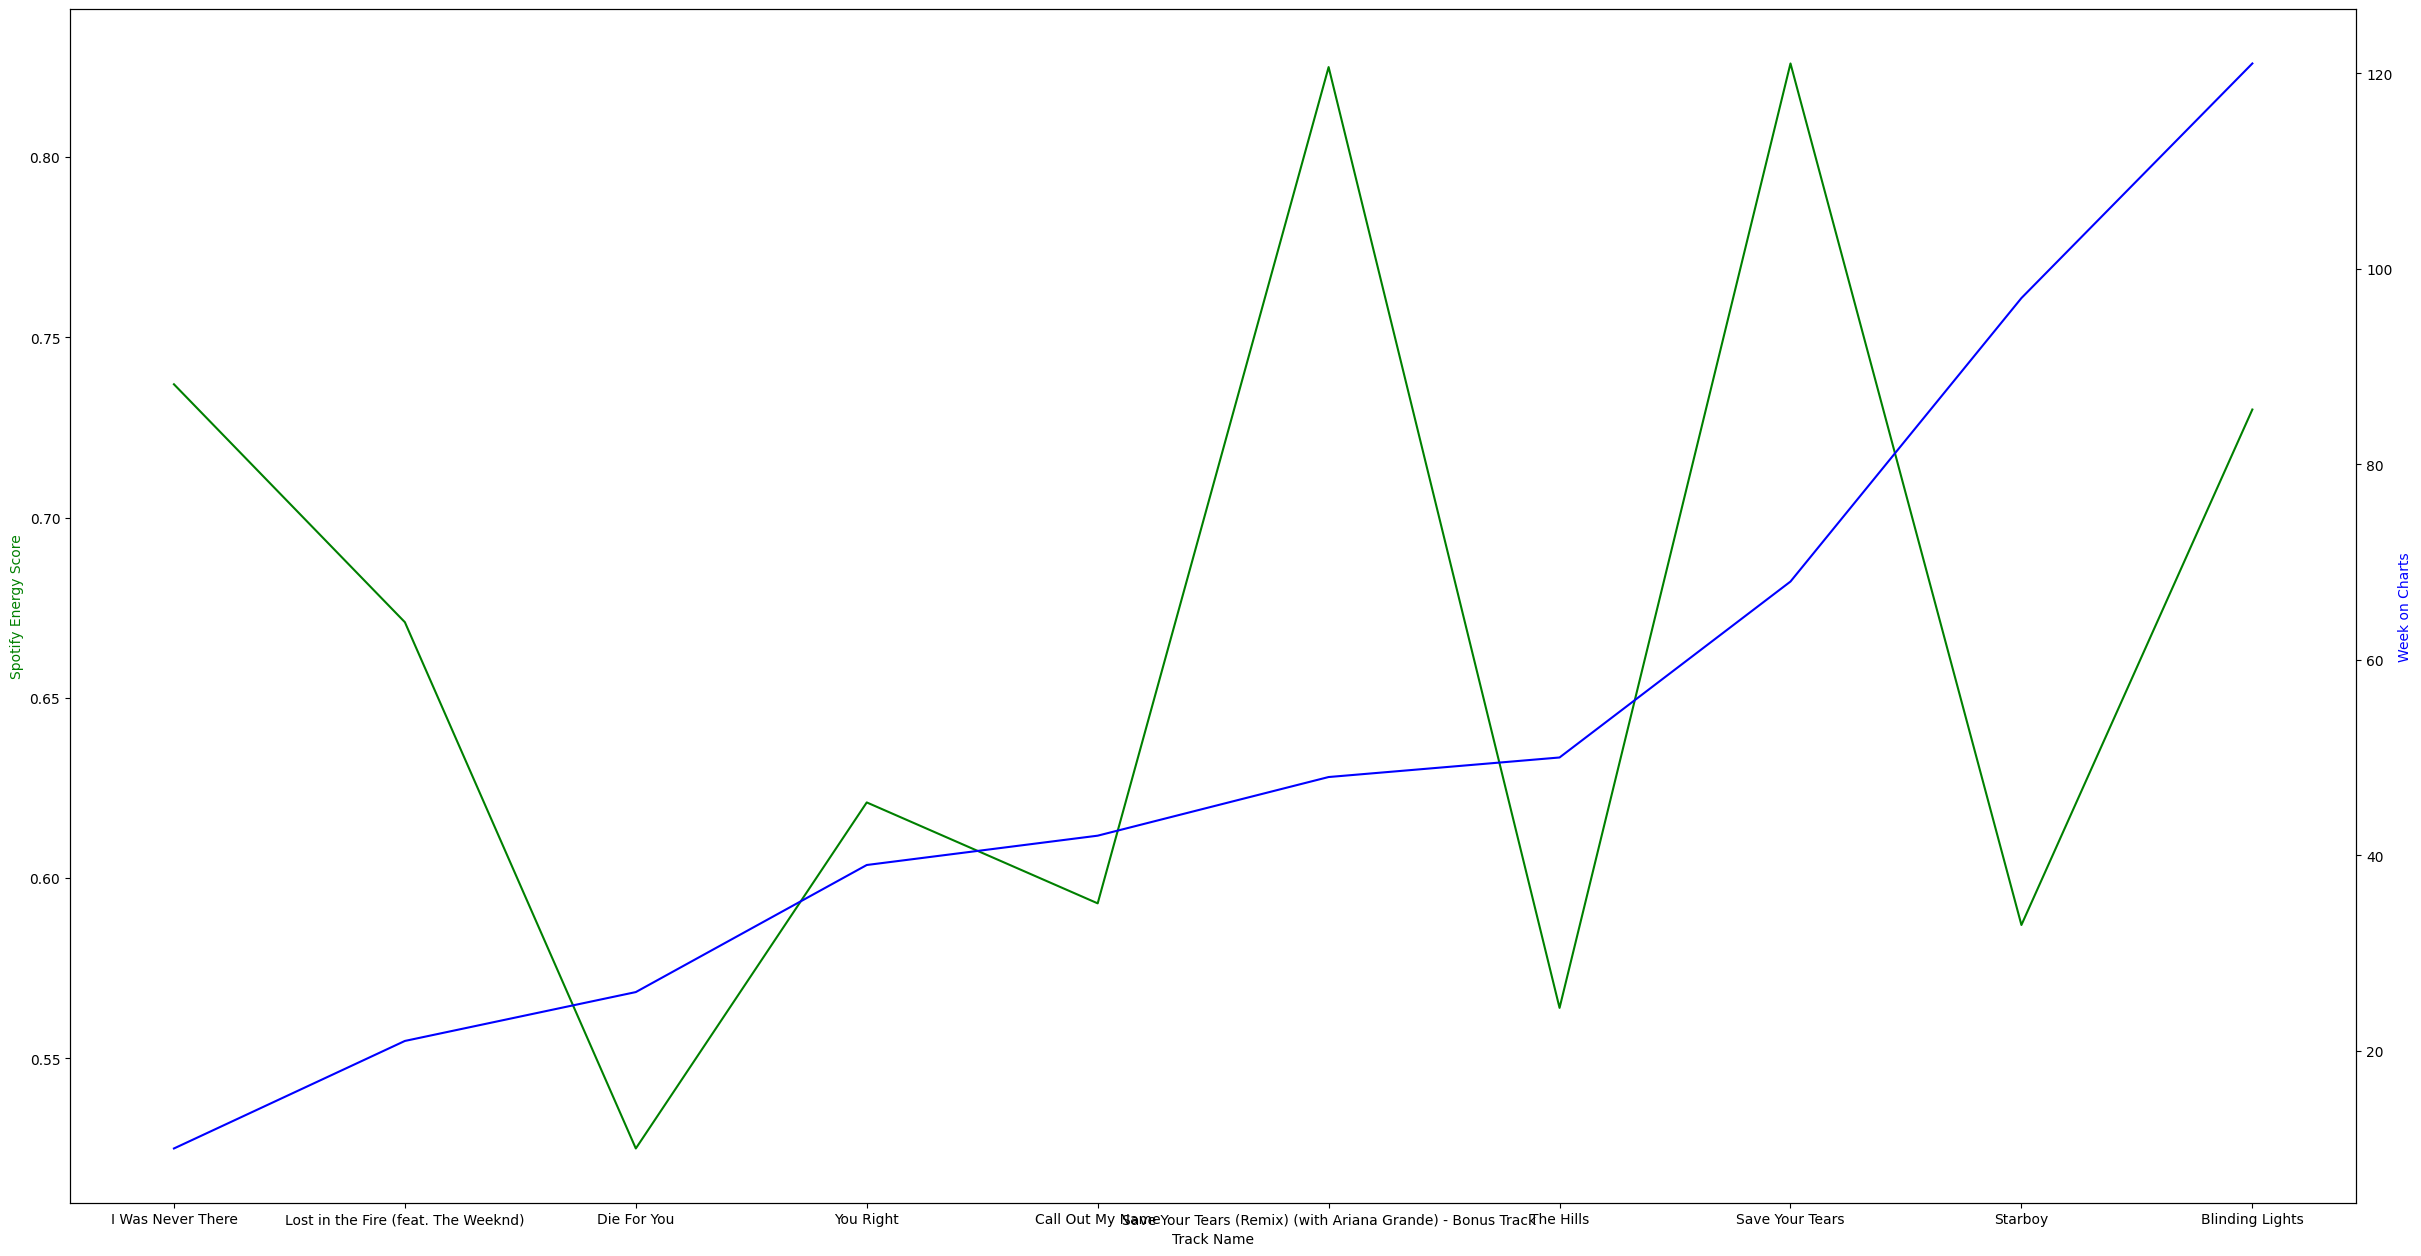

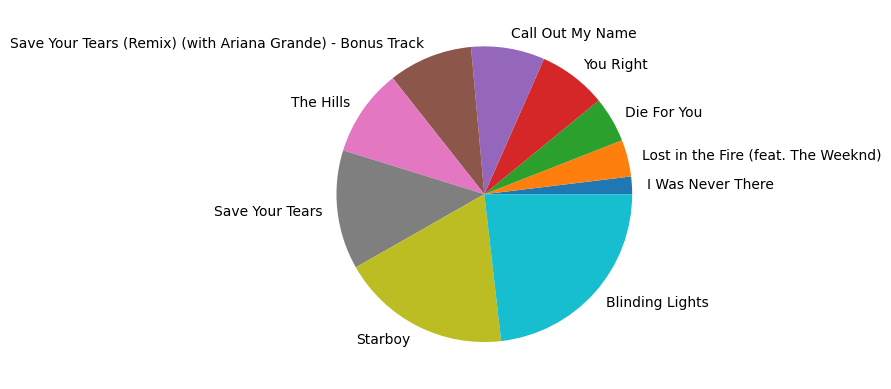

Showing Any Top 5 Song for Artist : John Legend
+---------------+
|name           |
+---------------+
|Ordinary People|
|All of Me      |
|Minefields     |
|Nervous        |
|Wonder Woman   |
+---------------+
only showing top 5 rows

Showing Song for Artist : John Legend on the Charts Week sorted by Week on Chart
+----------+------+--------------------+------------+--------------+
|track_name|energy|           artist_id|artist_names|weeks_on_chart|
+----------+------+--------------------+------------+--------------+
| All of Me| 0.264|5y2Xq6xcjJb2jVM54...| John Legend|           145|
+----------+------+--------------------+------------+--------------+

Song which has been in the maximum in the top charts is : All of Me with 145 week(s) on Charts 


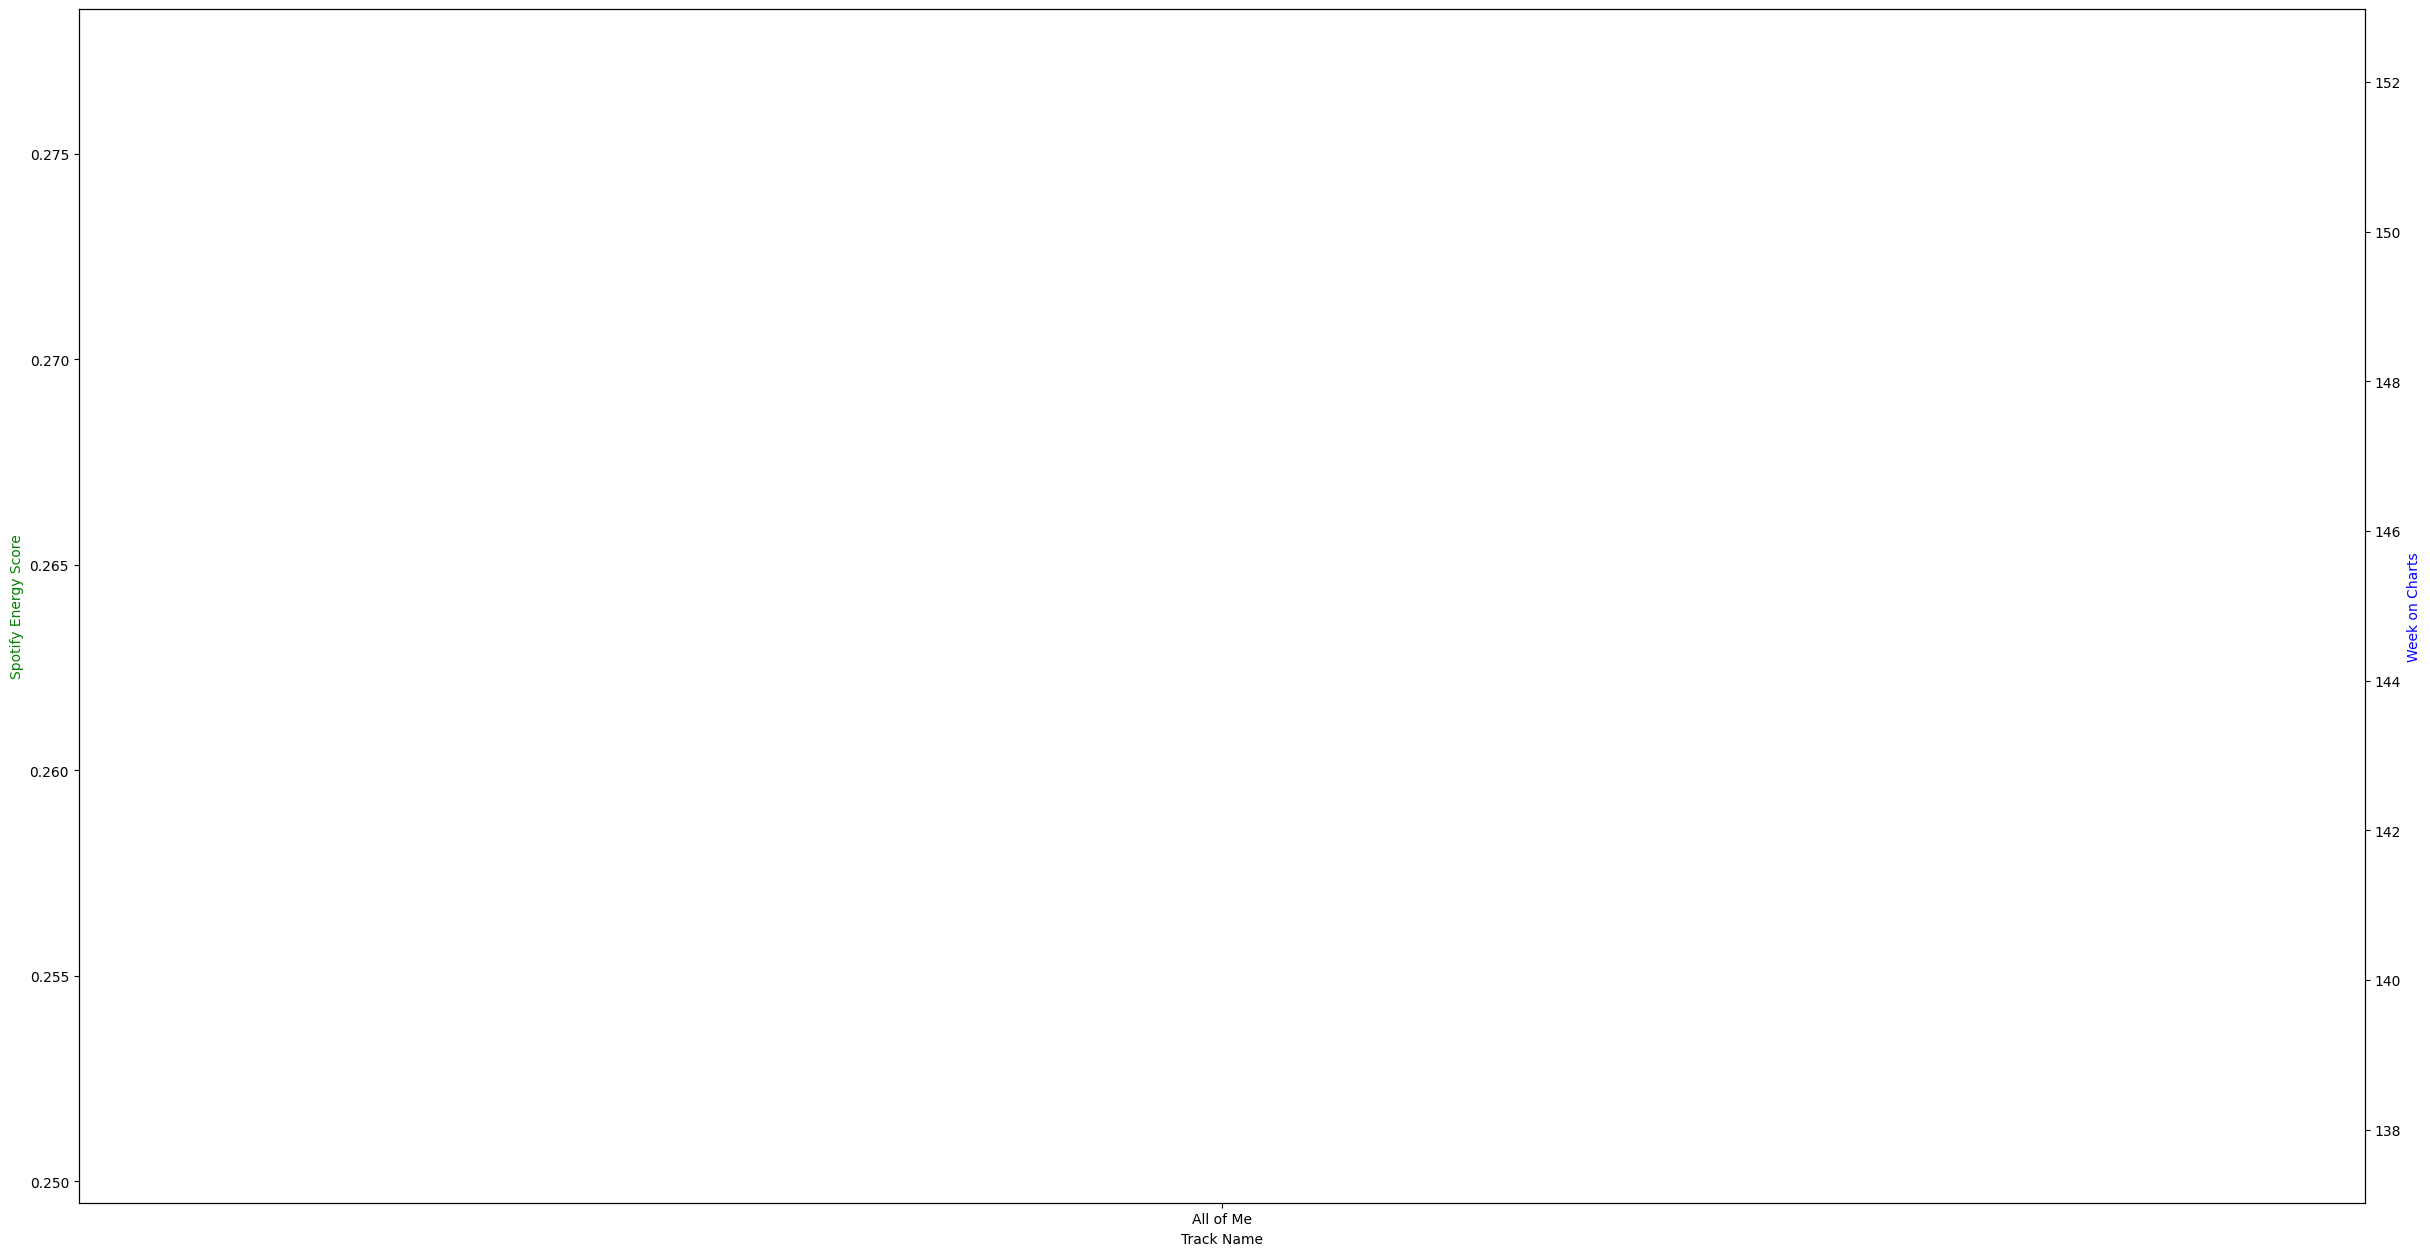

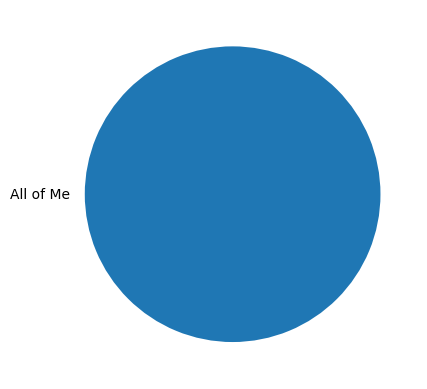

Showing Any Top 5 Song for Artist : Bad Bunny
+---------------+
|name           |
+---------------+
|Efecto         |
|Me Porto Bonito|
|LA CANCIÓN     |
|Neverita       |
|Party          |
+---------------+
only showing top 5 rows

Showing Song for Artist : Bad Bunny on the Charts Week sorted by Week on Chart
+----------------+------+--------------------+--------------------+--------------+
|      track_name|energy|           artist_id|        artist_names|weeks_on_chart|
+----------------+------+--------------------+--------------------+--------------+
|        Neverita| 0.498|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|           Tarot| 0.684|4q3ewBCX7sLwd24eu...|Bad Bunny, Jhay C...|            14|
|          Efecto| 0.475|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|Tití Me Preguntó| 0.715|4q3ewBCX7sLwd24eu...|           Bad Bunny|            14|
|           Party| 0.799|4q3ewBCX7sLwd24eu...|Bad Bunny, Rauw A...|            14|
|   Ojitos Lindos| 0.686

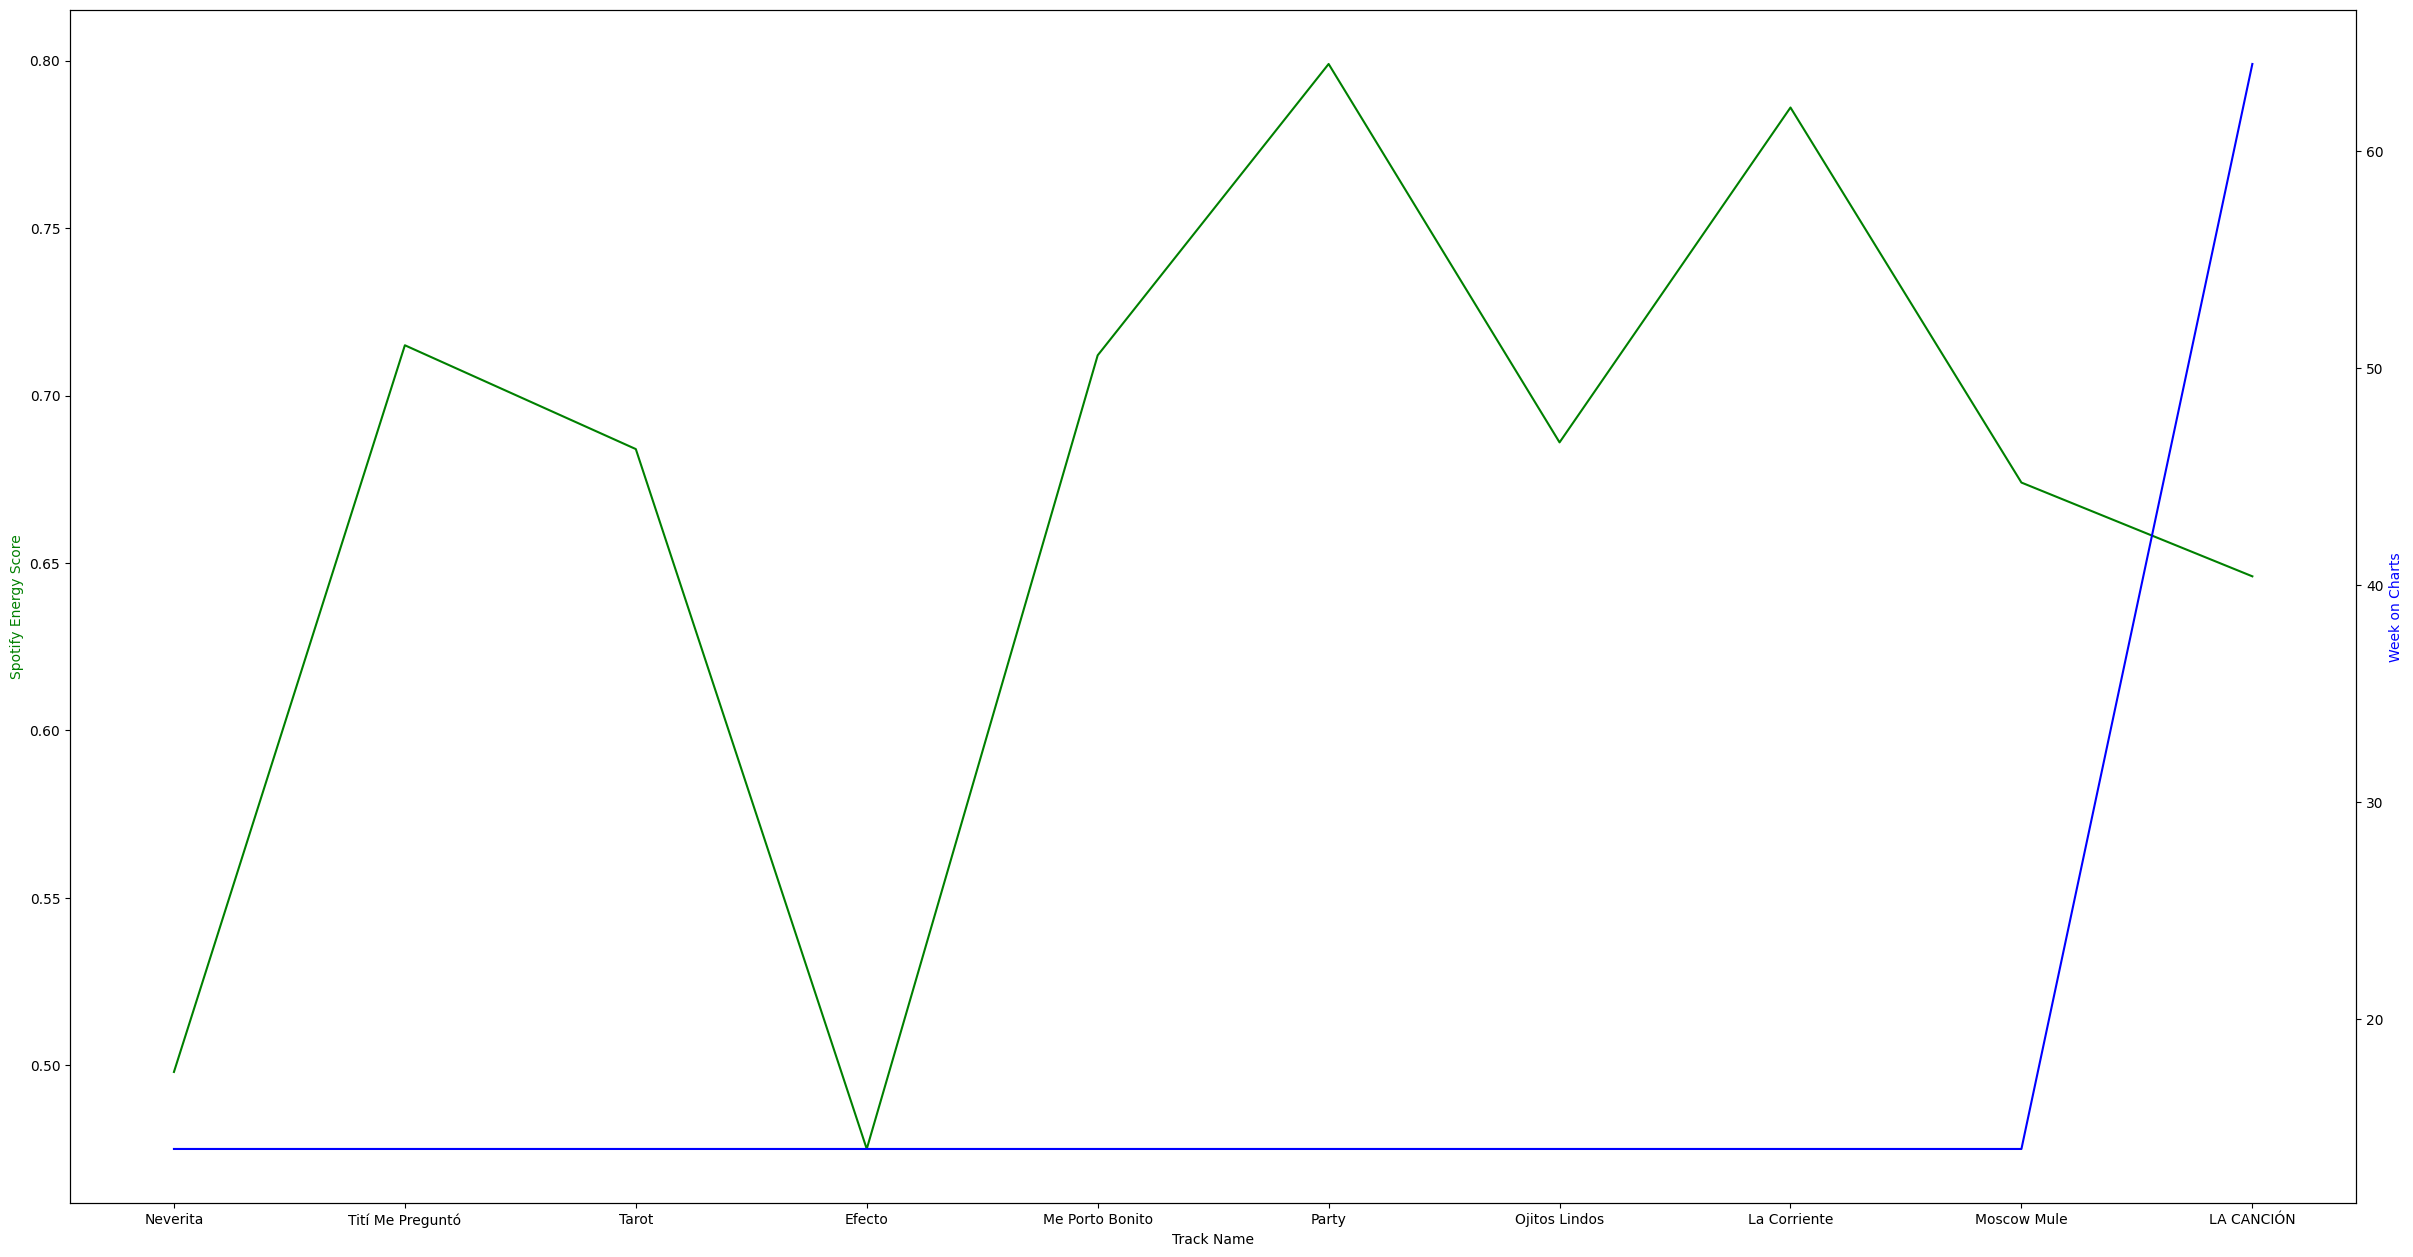

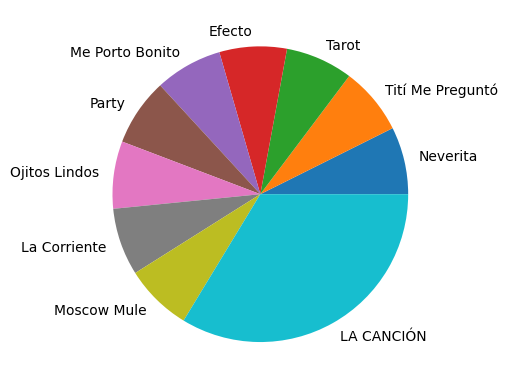

In [35]:
# Clean up top-chart Song Id - spotify:track:02MWAaffLxlfxAUY7c5dvx -->  02MWAaffLxlfxAUY7c5dvx
spotify_top_charts_22_cleaned = spotify_top_charts_22.withColumn("uri", split(spotify_top_charts_22['uri'], ':').getItem(2))

for artist,artist_id in main_artist_dict.items():
    print(f"Showing Any Top 5 Song for Artist : {artist}")
    top_tracks = top_tracks_main_artist.filter(top_tracks_main_artist["artist_id"]==artist_id)
    top_tracks.select("name").show(5, truncate=False)
    
    print(f"Showing Song for Artist : {artist} on the Charts Week sorted by Week on Chart")
    song_on_the_chart = top_tracks.join(spotify_top_charts_22_cleaned,top_tracks.id ==  spotify_top_charts_22_cleaned.uri,"inner")
    song_on_the_chart = song_on_the_chart.select(["track_name", "energy","artist_id", "artist_names", "weeks_on_chart"]).sort("weeks_on_chart")
    song_on_the_chart.show()
    
    print(f"Song which has been in the maximum in the top charts is : {song_on_the_chart.tail(1)[0].__getitem__('track_name')} with {song_on_the_chart.tail(1)[0].__getitem__('weeks_on_chart')} week(s) on Charts ")

    song_popularity_meter = song_on_the_chart.toPandas()

    x = song_popularity_meter['track_name']
    y1 = song_popularity_meter['energy']
    y2 = song_popularity_meter['weeks_on_chart']

    fig, ax1 = plt.subplots()
    fig.set_size_inches(29.5, 15.5)

    ax2 = ax1.twinx()

    ax1.plot(x, y1, 'g-')
    ax2.plot(x, y2, 'b-')

    ax1.set_xlabel('Track Name', color = 'black')
    ax1.set_ylabel('Spotify Energy Score', color = 'g')
    ax2.set_ylabel('Week on Charts', color = 'b')
    
    plt.show()
    plt.pie(song_popularity_meter['weeks_on_chart'], labels=song_popularity_meter['track_name'])

    plt.show()

# Spark Machine Learning - K-Means Cluster

### K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.

# Load Historical Songs

In [36]:
historical_songs_df = (spark.read
            .option("header","true")
            .option("inferSchema","true")
            .csv("spotify/HistoricalTracks.csv")            
            .distinct())

In [37]:
# Create A feature Vector
from pyspark.ml.feature import VectorAssembler

feature_columns = ["acoustics", "danceability", "instrumentalness", "energy"  ,"speechiness"]

assembler = VectorAssembler(inputCols=feature_columns,outputCol='featureVector')
historical_songs_df = assembler.transform(historical_songs_df)
historical_songs_df.show()

22/11/03 18:20:45 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+-------+--------------------+----------+--------------------+--------------------+------------+------------------+----------------+--------+--------------------+------------+------------+---------------+------------+------+----+--------+----+-----------+---------+----------------+----------+-------+-------+-----------+--------------+---------+------------------+---+--------+-----------+-----------+--------------------+--------------------+
|Country|                 Uri|Popularity|               Title|              Artist|Album/Single|             Genre|Artist_followers|Explicit|               Album|Release_date|Track_number|Tracks_in_album|danceability|energy| key|loudness|mode|speechiness|acoustics|instrumentalness|liveliness|valence|  tempo|duration_ms|time_signature|Genre_new|Days_since_release|USA|Popu_m

## Prepare a Feature dataframe to train the model

In [38]:
X = historical_songs_df.select(["acoustics", "danceability", "instrumentalness", "energy"  ,"speechiness", "featureVector"])
X.show()

+---------+------------+----------------+------+-----------+--------------------+
|acoustics|danceability|instrumentalness|energy|speechiness|       featureVector|
+---------+------------+----------------+------+-----------+--------------------+
|    0.278|       0.694|         1.34E-6| 0.758|      0.218|[0.278,0.694,1.34...|
|  0.00948|       0.769|         6.65E-5| 0.829|     0.0661|[0.00948,0.769,6....|
|  0.00988|       0.448|             0.0| 0.435|      0.039|[0.00988,0.448,0....|
|    0.984|       0.742|         5.78E-5| 0.432|     0.0615|[0.984,0.742,5.78...|
|    0.653|       0.735|           0.918| 0.525|     0.0441|[0.653,0.735,0.91...|
|    0.337|       0.706|             0.0| 0.485|      0.331|[0.337,0.706,0.0,...|
|   0.0847|       0.841|             0.0| 0.728|     0.0484|[0.0847,0.841,0.0...|
|    0.275|       0.558|             0.0| 0.566|     0.0243|[0.275,0.558,0.0,...|
|  0.00483|       0.516|         0.00895| 0.518|       0.04|[0.00483,0.516,0....|
|    0.183|     

## Find out the best K value in K-Means by plotting different K Values

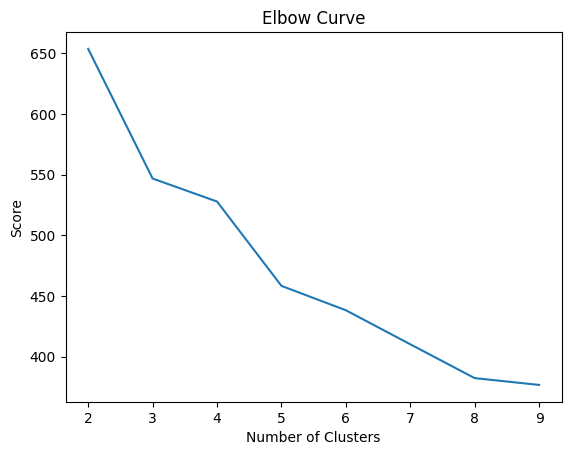

In [39]:
from pyspark.ml.clustering import KMeans

import numpy as np
import pandas as pd

cost = np.zeros(10)

for k in range(2,10):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('featureVector')
    model = kmeans.fit(X)
    cost[k] = model.summary.trainingCost

# Plot the cost
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = [2,3,4,5,6,7,8, 9]
df_cost.insert(0, 'cluster', new_col)

import pylab as pl
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [40]:
# Ideal K size is K = 5
# Since the song list is huge, take K = 20
kmeans = KMeans().setK(20)

kmeans.setSeed(1).setFeaturesCol('featureVector')
model = kmeans.fit(X)
model.setPredictionCol("cluster")

transformed = model.transform(historical_songs_df)
transformed.select(["Title","Artist","cluster"]).show(truncate=False)

+-----------------------------------+--------------------------------------------+-------+
|Title                              |Artist                                      |cluster|
+-----------------------------------+--------------------------------------------+-------+
|loco contigo                       |DJ Snake - J Balvin - Tyga                  |18     |
|perfect                            |Logic                                       |1      |
|spirit - from disneys the lion king|BeyoncÃ©                                    |13     |
|amorfoda                           |Bad Bunny                                   |17     |
|whoa                               |XXXTENTACION                                |12     |
|who dat boy                        |Tyler, The Creator - A$AP Rocky             |2      |
|goosebumps                         |Travis Scott                                |8      |
|christmas time                     |Backstreet Boys                             |0      |

## Create a Method to pull song in the same cluster, displayed by highest popularity

In [41]:
def print_similar_songs(query,display=5):
    query = query.lower()
    found_cluster = None
    try:
        found_cluster = transformed.filter(transformed['Title']==query).select(["cluster"]).head(1)[0].__getitem__('cluster')
    except:
        print("Song do not exists in Database for Suggestion")
        return
    
    print(f"Found on Cluster {found_cluster}")
    related_song = transformed.filter(transformed['cluster']==found_cluster).select(["Title", "Popularity", "Uri"])
    related_song = related_song.withColumn("Title", initcap(col('Title'))).withColumn("Title", initcap(col('Title'))).withColumnRenamed("Uri", "Link")
    related_song = related_song.withColumn("Link", concat(lit("https://open.spotify.com/track/"),col('Link')))
    related_song = related_song.orderBy(desc("Popularity")).take(display)
    for song in related_song:
            print(f"{song['Title']} - Listen @ {song['Link']} - Popularity {song['Popularity']}")
    

## Enter the Song Name to get related Songs Suggestion

In [42]:
# Put a Track Name here to get Suggestion.
print_similar_songs("All of Me")

Found on Cluster 6
Lovely - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0u2P5u6lvoDfwTYjAADbn4 - Popularity 79693.9
When The Partys Over - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/43zdsphuZLzwA9k4DJhU0I - Popularity 57236.95
If The World Was Ending - Feat. Julia Michaels - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/2kJwzbxV2ppxnQoYw4GLBZ - Popularity 32621.3
Ocean Eyes - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/2uIX8YMNjGMD7441kqyyNU - Popularity 27515.6
When The Partys Over - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/14JzyD6FlBD5z0wV5P07YI - Popularity 26340.3


## Related Song Suggestion for the Main Artist's Song which has been on the Top Charts

In [43]:
for artist,artist_id in main_artist_dict.items():
    top_tracks = top_tracks_main_artist.filter(top_tracks_main_artist["artist_id"]==artist_id)
    song_on_the_chart = top_tracks.join(spotify_top_charts_22_cleaned,top_tracks.id ==  spotify_top_charts_22_cleaned.uri,"inner")
    song_on_the_chart = song_on_the_chart.select(["track_name", "energy","artist_id", "artist_names", "weeks_on_chart"]).sort("weeks_on_chart")
    print(f"\nSong which has been in the maximum in the top charts is for - {artist} is : {song_on_the_chart.tail(1)[0].__getitem__('track_name')}")
    if song_on_the_chart.tail(1)[0].__getitem__('track_name'):
        print_similar_songs(song_on_the_chart.tail(1)[0].__getitem__('track_name'))


Song which has been in the maximum in the top charts is for - OneRepublic is : I Ain't Worried
Song do not exists in Database for Suggestion

Song which has been in the maximum in the top charts is for - Harry Styles is : Watermelon Sugar
Found on Cluster 11
Blinding Lights - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0VjIjW4GlUZAMYd2vXMi3b - Popularity 57327.4
Watermelon Sugar - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/6UelLqGlWMcVH1E5c4H7lY - Popularity 53686.25
Silence - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/7vGuf3Y35N4wmASOKLUVVU - Popularity 44758.05
Blinding Lights - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/0sf12qNH5qcw8qpgymFOqD - Popularity 26362.55
Stargazing - Listen @ https://open.spotify.com/track/https://open.spotify.com/track/7wBJfHzpfI3032CSD7CE2m - Popularity 26353.75

Song which has been in the maximum in the top charts is for - The Weeknd is : Blin